## I. Prep Work

#### First, importing libraries and helper functions we need. 

In [43]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

#### Next, reading in the analytical base table saved at the end of Workbook 2.

In [44]:
# Load analytical base table from Module 2
abt = pd.read_csv('analytical_base_table.csv')

0.029


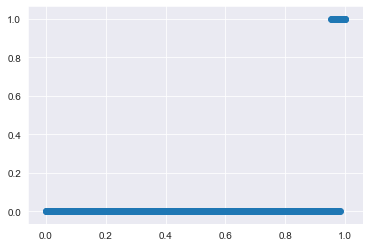

In [45]:
# Input feature
x = np.linspace(0, 1, 1000)

# Noise
np.random.seed(555)
noise = np.random.uniform(-0.02,0.02, 1000)

# Target variable
y = ((x + noise) > 0.97).astype(int)

# Reshape input feature for sklearn
X = x.reshape(-1, 1)
print(y.mean())
# Plot the noisy conditional dataset
plt.scatter(X, y)
plt.show()

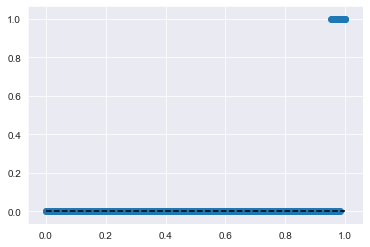

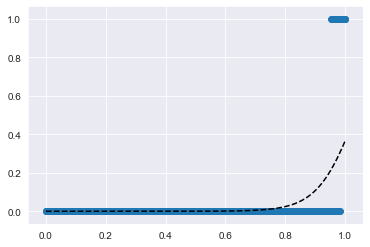

In [46]:
pred_dumb = [0] * len(y)
plt.scatter(X, y)
plt.plot(X, pred_dumb, 'k--')
plt.show()
clf = LogisticRegression(random_state=123, C=10)
clf.fit(X, y)
# Predicted Classes
pred_class = clf.predict(X)

# Class Probabilities
pred = clf.predict_proba(X)
pred = [p[1] for p in pred] # Positive class (1) probabilities
plt.scatter(X, y)
plt.plot(X, pred, 'k--')

plt.show()

In [47]:
from sklearn.metrics import accuracy_score

print( 'Dumb Model Acc:', accuracy_score(y, pred_dumb) )
print( 'Logistic Reg. Acc:', accuracy_score(y, pred_class))
all(pred_dumb == pred_class)
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Display confusion matrix
print( confusion_matrix(y, pred_class) )
cm = confusion_matrix(y, pred_class)

# True Positives (TP)
tp = cm[1][1]

# False Positives (FP)
fp = cm[0][1]

# True Negatives (TN)
tn = cm[0][0]

# False Negatives (FN)
fn = cm[1][0]

true_positive_rate = tp / (tp + fn)
print( 'TPR:', true_positive_rate )

false_positive_rate = fp / (fp + tn)
print( 'FPR:', false_positive_rate )
# Last 10 predicted probabilities
print( np.round(pred[-10:],2) )
# Last 10 predicted classes
print( pred_class[-10:] )
# Predicted class based on lower threshold
pred_class_v2 = (np.array(pred) > 0.25).astype(int)
# Display confusion matrix
print( confusion_matrix(y, pred_class_v2) )

Dumb Model Acc: 0.971
Logistic Reg. Acc: 0.971
[[971   0]
 [ 29   0]]
TPR: 0.0
FPR: 0.0
[0.33 0.34 0.34 0.34 0.35 0.35 0.35 0.36 0.36 0.36]
[0 0 0 0 0 0 0 0 0 0]
[[962   9]
 [  3  26]]


TPR (0.25 Threshold): 0.896551724137931
FPR (0.25 Threshold): 0.009268795056642637


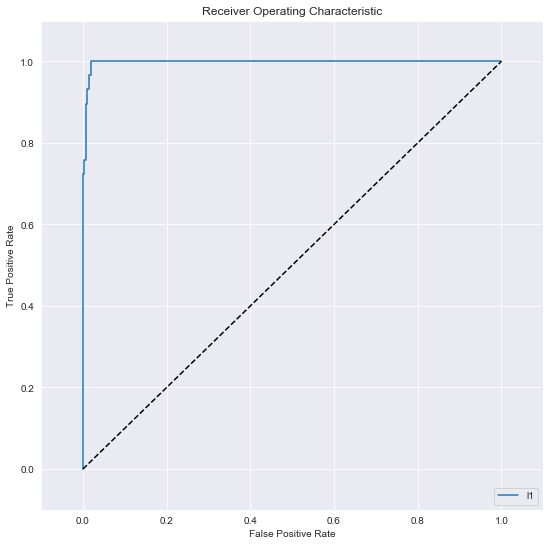

0.5

In [48]:
cm_v2 = confusion_matrix(y, pred_class_v2)

# True Positives (TP)
tp_v2 = cm_v2[1][1]

# False Positives (FP)
fp_v2 = cm_v2[0][1]

# True Negatives (TN)
tn_v2 = cm_v2[0][0]

# False Negatives (FN)
fn_v2 = cm_v2[1][0]

true_positive_rate_v2 = tp_v2 / (tp_v2 + fn_v2)
print( 'TPR (0.25 Threshold):', true_positive_rate_v2 )

false_positive_rate_v2 = fp_v2 / (fp_v2 + tn_v2)
print( 'FPR (0.25 Threshold):', false_positive_rate_v2 )
# Classification metrics
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve from y and pred
fpr, tpr, thresholds = roc_curve(y, pred)
pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})
# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc_score(y, pred)
roc_auc_score(y, pred_dumb)


## <span style="color:RoyalBlue"> 4.1 - Split Your Dataset</span>

#### A.) First, separating the dataframe into separate objects for the target variable, <code style="color:steelblue">y</code>, and the input features, <code style="color:steelblue">X</code>.

In [49]:
# Create separate object for target variable
y = abt.status

# Create separate object for input features
X = abt.drop('status', axis=1)

#### B.) After importing the function, split <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> into training and test sets.
* Pass in the argument <code style="color:steelblue">test_size=<span style="color:crimson">0.2</span></code> to set aside 20% of our observations for the test set.
* Pass in <code style="color:steelblue">random_state=<span style="color:crimson">1234</span></code> to set the random state for replicable results.

In [50]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=abt.status)

# Print number of observations in X_train, X_test, y_train, and y_test
print( len(X_train), len(X_test), len(y_train), len(y_test) )

11254 2814 11254 2814


## <span style="color:RoyalBlue"> 4.2 - Building Model Pipelines</span>

#### A.) First, making sure I've imported 2 important tools for this step.
* <code style="color:steelblue">make_pipeline()</code> for building the pipeline.
* <code style="color:steelblue">StandardScaler()</code> for standardization.

#### B.) Next, creating a single <span style="color:royalblue">pipeline dictionary</span> with pipelines for each algorithm.
* Using the keys:
    * <code style="color:crimson">'l1'</code> for $L_1$-regularized logistic regression
    * <code style="color:crimson">'l2'</code> for $L_2$-regularized logistic regression
    * <code style="color:crimson">'rf'</code> for random forest
    * <code style="color:crimson">'gb'</code> for gradient boosted tree.

In [65]:
# Pipeline dictionary
pipelines = {
    'l1' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=123)),
    'l2' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

## <span style="color:RoyalBlue"> 4.3 - Declaring Hyperparameter Grids</span>

#### A.) First, listing the tunable hyperparameters of my $L_1$-regularized logistic regression pipeline.

In [66]:
# List tuneable hyperparameters of our Logistic pipeline
pipelines['l1'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'stand

#### B.) Declaring the hyperparameter grids for     <code style="color:crimson">l1</code> ($L_1$-regularized logistic regression) and <code style="color:crimson">l2</code> ($L_2$-regularized logistic regression).
* Trying the following values for <code>C</code>: <code>[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]</code>

In [67]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

l2_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

#### C.) Next, declaring the hyperparameter grid for your  random forest.


In [68]:
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

#### D.) Next, declaring the hyperparameter grid for the boosted tree.

In [69]:
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

#### E.) Finally, now that I have all of my hyperparameters declared, I store them in a dictionary for ease of access.

In [70]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

## <span style="color:RoyalBlue"> 4.4 - Fitting and Tuning Models with Cross-Validation</span>

#### A.) First, ensuring that I imported the helper for cross-validation, <code style="color:steelblue">GridSearchCV</code>.

#### B.) Creating a <code style="color:SteelBlue">fitted_models</code> dictionary that includes models that have been tuned using cross-validation.
* The keys are the same as those in the <code style="color:SteelBlue">pipelines</code> and <code style="color:SteelBlue">hyperparameters</code> dictionaries. 
* The values are <code style="color:steelblue">GridSearchCV</code> objects that have been fitted to <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code>.

In [71]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


## <span style="color:RoyalBlue"> 4.5 - AUROC Review</span>

#### A.) First, displaying the <code style="color:steelblue">best\_score_</code> attribute for each fitted model.


In [72]:
for i, model in fitted_models.items():
    print(i, model.best_score_)

l1 0.8493863035326624
l2 0.8493863035326624
rf 0.9796513913558318
gb 0.9753863824748372


#### B.) Finding the predicted classes from your $L_1$-regularized logistic regression and displaying the first 10. 

In [73]:
# Predict classes using L1-regularized logistic regression 
pred = fitted_models['l1'].predict(X_test)

# Display first 10 predictions
print( pred[:10] )

[0 0 0 0 0 0 0 1 1 0]


#### C.) Next, displaying the confusion matrix for the set of predictions from part (B).

In [74]:
# Display confusion matrix for y_test and pred
print( confusion_matrix(y_test, pred) )

[[1969  172]
 [ 221  452]]


#### D.) Next, finding the predicted positive class probabilities from your $L_1$-regularized logistic regression and displaying the first 10.


In [75]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['l1'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
print(np.round(pred[:10], 2))

[0.03 0.   0.01 0.09 0.07 0.48 0.13 0.62 0.73 0.14]


#### E.) Next, calculating the ROC curve for your $L_1$-regularized logistic regression using the <code style="color:steelblue">roc_curve()</code> function that was imported earlier.

In [76]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

#### F.) Plotting the entire ROC curve for your $L_1$-regularized logistic regression.

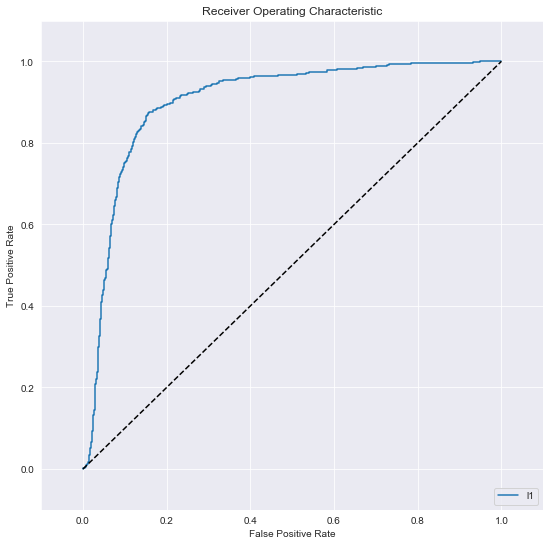

In [77]:
# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="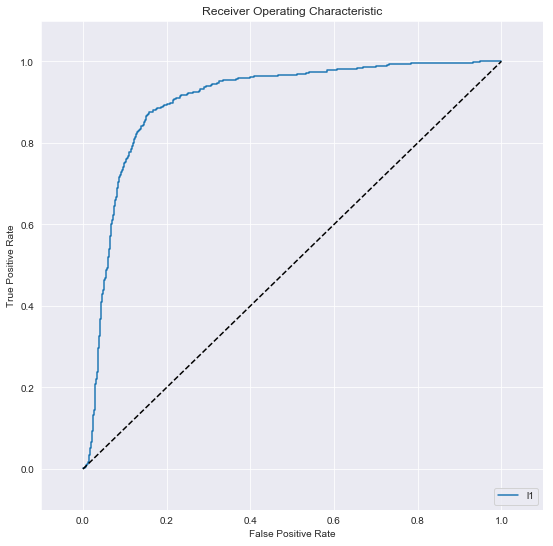&#10;">

#### G.) Finally, answering this question: What is the probability that a randomly chosen <code style="color:crimson">'Left'</code> observation ranks higher (has a higher predicted probability) than a randomly chosen <code style="color:crimson">'Employed'</code> observation?

In [78]:
# Calculate AUROC
print(roc_auc_score(y_test, pred))

0.9015381433597084


## <span style="color:RoyalBlue"> 4.6 - Pick the Winner</span>

#### A.) Using a <code style="color:SteelBlue">for</code> loop, printing the AUROC performance of each model in <code style="color:SteelBlue">fitted_models</code> on the test set.


In [79]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    print(name, roc_auc_score(y_test, pred))

l1 0.9015381433597084
l2 0.9015381433597084
rf 0.9915194952019338
gb 0.9890970391278188


#### B.) Finally, saving the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.

In [80]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)